In [30]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from functions_old.multi_gradient_descent import *

In [31]:
def feature_scaling(data):
    if len(data.shape) >1:
        k = np.zeros(data.shape[1])
        # for r in range(data.shape[0]):
        for c in range(data.shape[1]):
            k[c] = np.sum(data[:,c])
        k = k/data.shape[0]
        for c in range(data.shape[1]):
            f = np.max(data[:,c]) - np.min(data[:,c])
            data[:,c] -= k[c]
            data[:,c] /= f
        return data
    else:
        return (data-(np.sum(data)/data.shape[0]))/(np.max(data) - np.min(data))


In [32]:
file = "./data from book/advertising.csv"
data = pd.read_csv(file)
print(data.head())
x_data = np.array([[x,x**2] for x in data['TV']])
x_test = x_data[150:]
x_data = x_data[0:150]

y_data = np.array(data['sales'])
y_test = y_data[150:]
y_data = y_data[0:150]


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [33]:
# fetaure scaling
x_data = feature_scaling(x_data)
y_data = feature_scaling(y_data)
x_test = feature_scaling(x_test)
y_test = feature_scaling(y_test)


In [34]:
# w = np.array([0.0907175772,-0.0000437060026])
w = np.zeros(x_data.shape[1])
b=0
per_w,per_b = gradient_descent(x_data,y_data,w,b,2,5000)
print(per_w, per_b)

[0.10253073 0.09566809] -2.538709982976191e-16 -------------------------------- j:  0.016033734175168922 dj_dw:  [-0.05126536 -0.04783404] dj_db:  1.2693549914880956e-16
[0.33150102 0.2629049 ] -2.1667852697267638e-16 -------------------------------- j:  0.009232844225423928 dj_dw:  [-0.00238861  0.00057078] dj_db:  1.2878587085651817e-16
[0.36379998 0.23772718] -2.337019466835955e-16 -------------------------------- j:  0.00914823242867674 dj_dw:  [-0.00141614  0.00139163] dj_db:  1.3859284090737373e-16
[0.39108688 0.21039618] -2.5553633283455687e-16 -------------------------------- j:  0.009073826693131502 dj_dw:  [-0.00133049  0.00133861] dj_db:  1.687538997430238e-16
[0.41696415 0.18435134] -2.8699265186560306e-16 -------------------------------- j:  0.009006584263716474 dj_dw:  [-0.00126454  0.00127284] dj_db:  1.9428902930940242e-16
[0.44156323 0.15959065] -2.7663057030243494e-16 -------------------------------- j:  0.008945814870301641 dj_dw:  [-0.00120213  0.00121003] dj_db:  1

In [35]:
# t = np.arange(0,150,1)
# t = np.array([[x,x**2] for x in t])
# pred = predict_graph(t,per_w,per_b)
pred = predict_graph(x_data,per_w,per_b)
pred

array([ 0.17780181, -0.2126525 , -0.29108245,  0.0428316 ,  0.09836348,
       -0.31660139, -0.17719761, -0.02334342, -0.31690472,  0.13105851,
       -0.15441394,  0.15487347, -0.27162779, -0.07576466,  0.13809595,
        0.12371911, -0.14997345,  0.24181827, -0.14633226,  0.03436308,
        0.16053862,  0.18807178, -0.30302633,  0.17521032, -0.16441525,
        0.22092462,  0.0253546 ,  0.19177271,  0.20333964, -0.14270523,
        0.25355982, -0.03979521, -0.07648237,  0.22412808, -0.08008073,
        0.25138753,  0.2256517 , -0.13216467, -0.21654355,  0.17477612,
        0.13549298,  0.09151147,  0.25424367,  0.14260665, -0.26783292,
        0.08804633, -0.09463671,  0.19150038,  0.1736151 , -0.1523217 ,
        0.13105851, -0.06886023,  0.15748866,  0.10157275,  0.22068523,
        0.12956865, -0.32085458,  0.01136846,  0.14879501,  0.14863771,
       -0.18797675,  0.21900142,  0.19068163, -0.06342751,  0.00050488,
       -0.14685156, -0.24932849,  0.01787998,  0.18807178,  0.15

[ 0.9154274  -0.31738764] -0.00000000


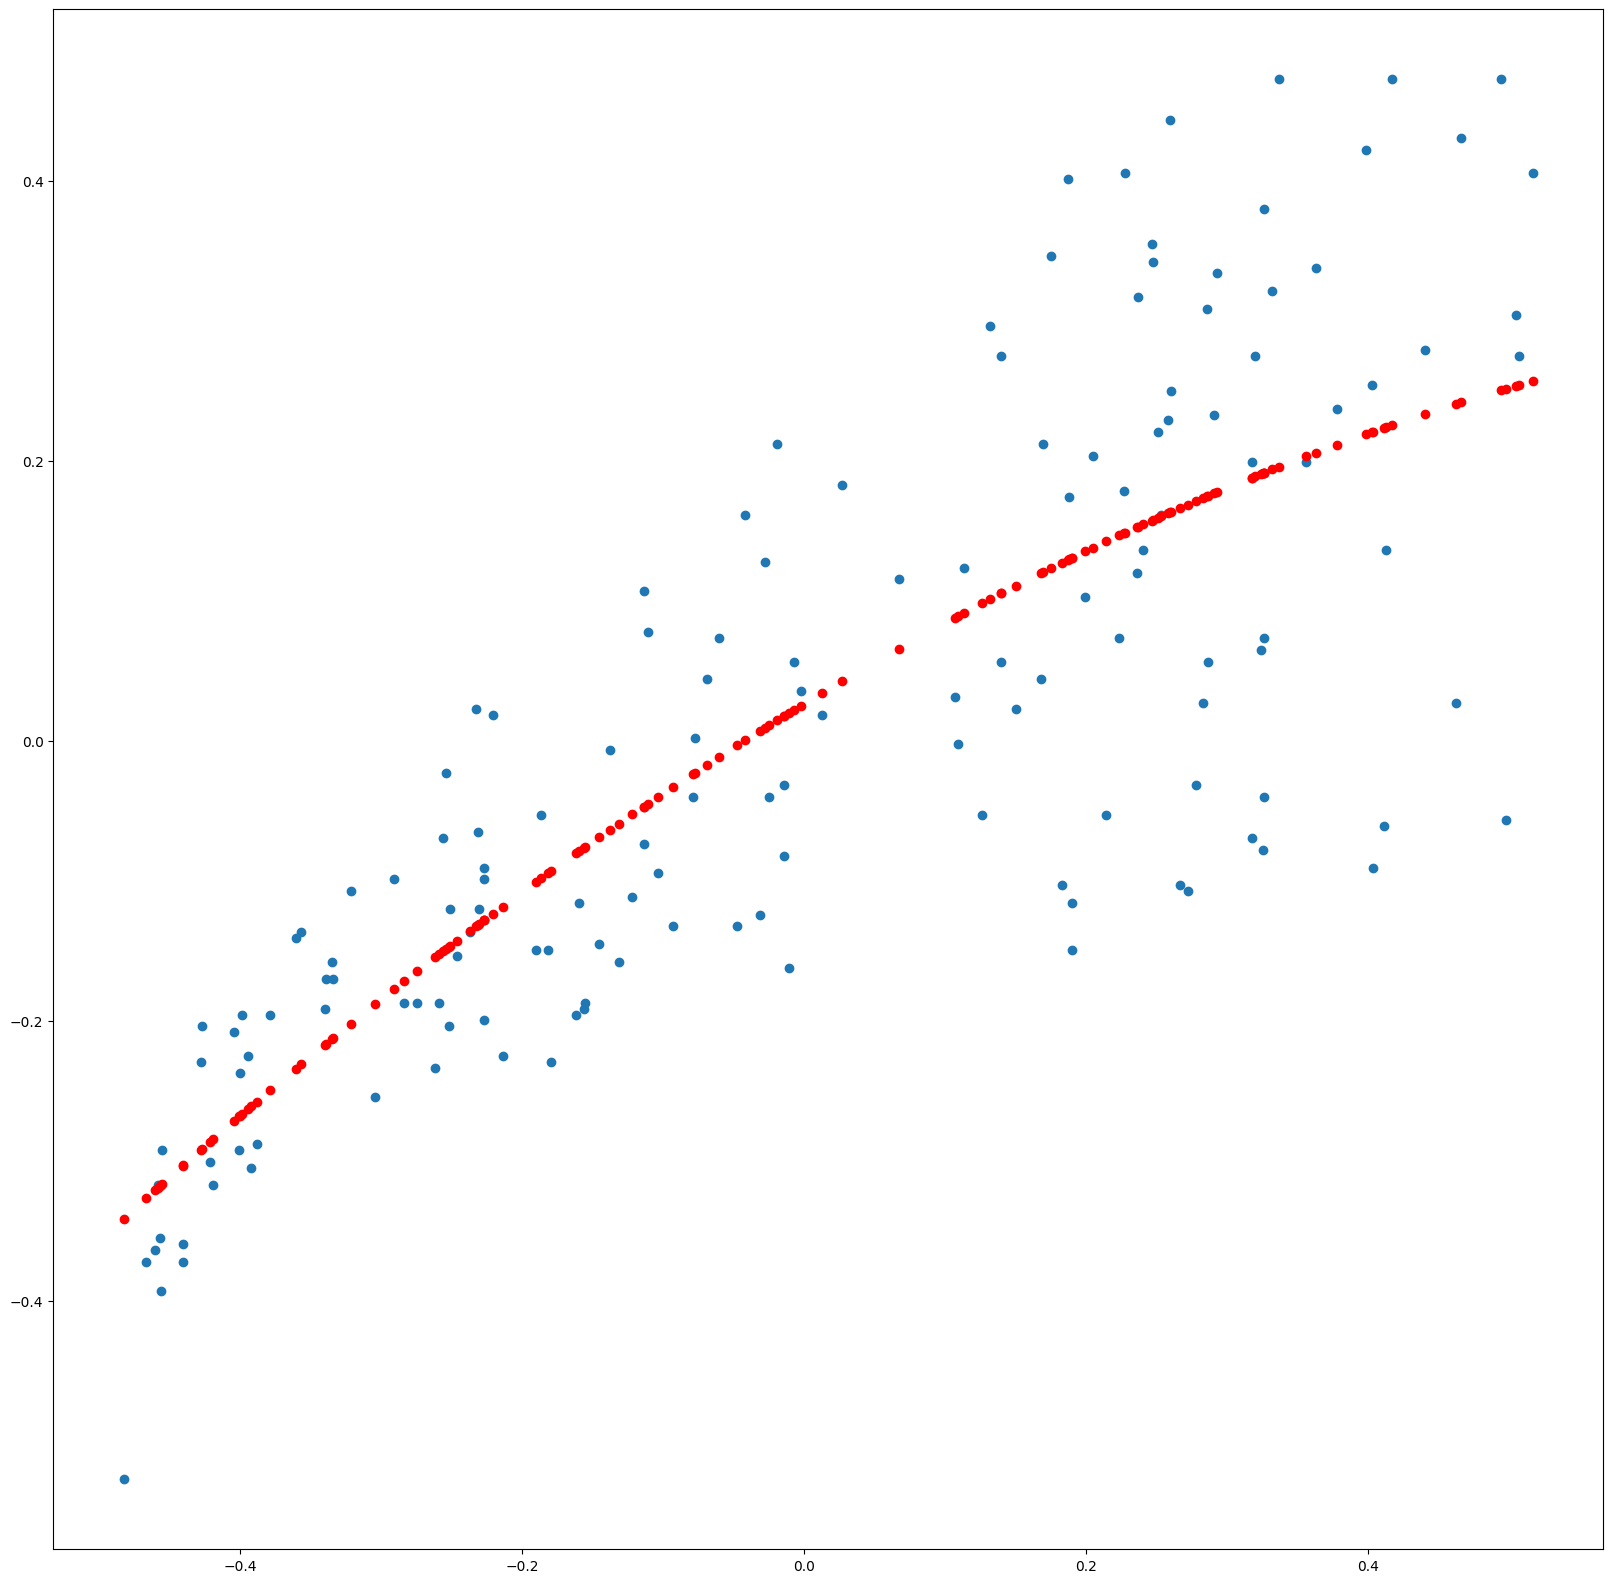

In [36]:
print(per_w,'%.08f' %per_b)
# pl.figure(figsize=[20,20])
pl.scatter(x_data[:,0],y_data)
pl.scatter(x_data[:,0],pred,color= "red")
pl.show()

In [37]:

print(accuracy(x_test, y_test,per_w,per_b))

156.78841085463773


In [38]:
# 47 percent error 
#with enormous number of iterations 32.63
# feature scalling 98 percent error


In [39]:
# w = np.array([0.0907175772,-0.0000437060026])
# b=0.10165765468193186

<h1>Test 2</h1>

In [43]:
data2 = pd.read_csv("./data from book/Boston.csv")
# data2 = data2[["age","crim"]]
print(data2.head())
# print(data2.shape)
# data2 = np.array(data2)
x_data = np.array([[x,x**2] for x in data2['age']])
x_test = x_data[300:]
x_data = x_data[0:300]

y_data = np.array(data2['crim'])
y_test = y_data[300:]
y_data = y_data[0:300]


   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat  medv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  


In [44]:
x_data = feature_scaling(x_data)
y_data = feature_scaling(y_data)
x_test = feature_scaling(x_test)
y_test = feature_scaling(y_test)

In [45]:
w = np.zeros(x_data.shape[1])
b=0
per_w,per_b = gradient_descent(x_data,y_data,w,b,2,5000)
print(per_w, per_b)

[0.04901362 0.06193664] 6.291263806209221e-18 -------------------------------- j:  0.010904519515933485 dj_dw:  [-0.02450681 -0.03096832] dj_db:  -3.1456319031046104e-18
[0.09571106 0.17018217] -6.80936788436763e-17 -------------------------------- j:  0.00952999121015033 dj_dw:  [ 0.00119626 -0.00130139] dj_db:  7.512509133296894e-17
[0.07016769 0.19314091] -9.344377123928438e-18 -------------------------------- j:  0.009471109986719965 dj_dw:  [ 0.00127078 -0.00110653] dj_db:  1.5982585625332985e-17
[0.0453151  0.21475954] 1.0639637319324046e-18 -------------------------------- j:  0.009416964141633411 dj_dw:  [ 0.00121956 -0.00106069] dj_db:  8.696747026230393e-18
[0.02147444 0.23549438] -2.4008572907519053e-17 -------------------------------- j:  0.00936714521759273 dj_dw:  [ 0.00116982 -0.00101742] dj_db:  3.716934167859639e-17
[-0.00139382  0.25538347] 5.4123372450476e-18 -------------------------------- j:  0.009321307439534304 dj_dw:  [ 0.00112211 -0.00097592] dj_db:  2.3360942

In [52]:
pred = predict_graph(x_data,per_w,per_b)


[-0.53918699  0.72311562] 0.00000000


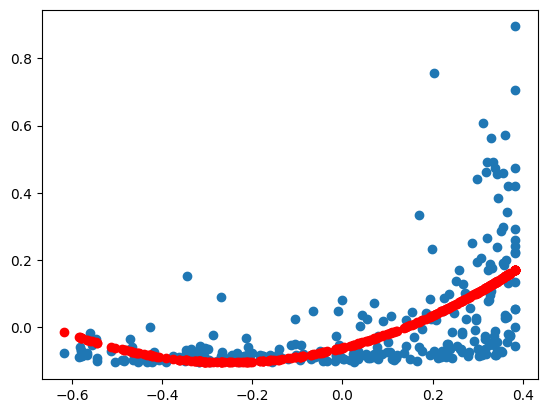

In [48]:
print(per_w,'%.08f' %per_b)
# pl.figure(figsize=[20,20])
pl.scatter(x_data[:,0],y_data)
pl.scatter(x_data[:,0],pred,color= "red")
pl.show()

In [49]:
print(accuracy(x_test, y_test,per_w,per_b))

1100.3251657697786
